<a href="https://colab.research.google.com/github/iamrosy20/WASSUPAI/blob/main/HW_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **타이타닉 생존자 예측**

train_x.csv와 train_y.csv를 이용하여 머신러닝 모델을 선정, 훈련시켜 test_x.csv에 대한 생존여부를 예측한다.

(작성자: WASSUP AI 2기 김수현)

In [ ]:
# Import some libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [ ]:
# Load dataset
X_train_path = '/content/train_x.csv'
X_test_path = '/content/test_x.csv'
y_train_path = '/content/train_y.csv'

X_train_data = pd.read_csv(X_train_path)
X_test_data = pd.read_csv(X_test_path)
y_train_data = pd.read_csv(y_train_path)

## **1. 데이터 전처리**

In [ ]:
# Check basic information of the dataset
print("Information of train_x.csv")
print(X_train_data.info())
print("Information of test_x.csv")
print(X_test_data.info())
print("Information of train_y.csv")
print(y_train_data.info())

Information of train_x.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1047 non-null   int64  
 1   PassengerId  1047 non-null   int64  
 2   Pclass       1047 non-null   int64  
 3   Name         1047 non-null   object 
 4   Sex          1047 non-null   object 
 5   Age          847 non-null    float64
 6   SibSp        1047 non-null   int64  
 7   Parch        1047 non-null   int64  
 8   Ticket       1047 non-null   object 
 9   Fare         1046 non-null   float64
 10  Cabin        239 non-null    object 
 11  Embarked     1045 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 98.3+ KB
None
Information of test_x.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  ---

In [ ]:
# Remove unnecessary column 'Unnamed: 0'
X_train_data.drop(['Unnamed: 0', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
X_test_data.drop(['Unnamed: 0', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
y_train_data.drop('Unnamed: 0', axis=1, inplace=True)

Information of age in train_x.csv
Mean: 29.60242030696576
Minimum: 0.17
Maximum: 80.0
Median: 28.0


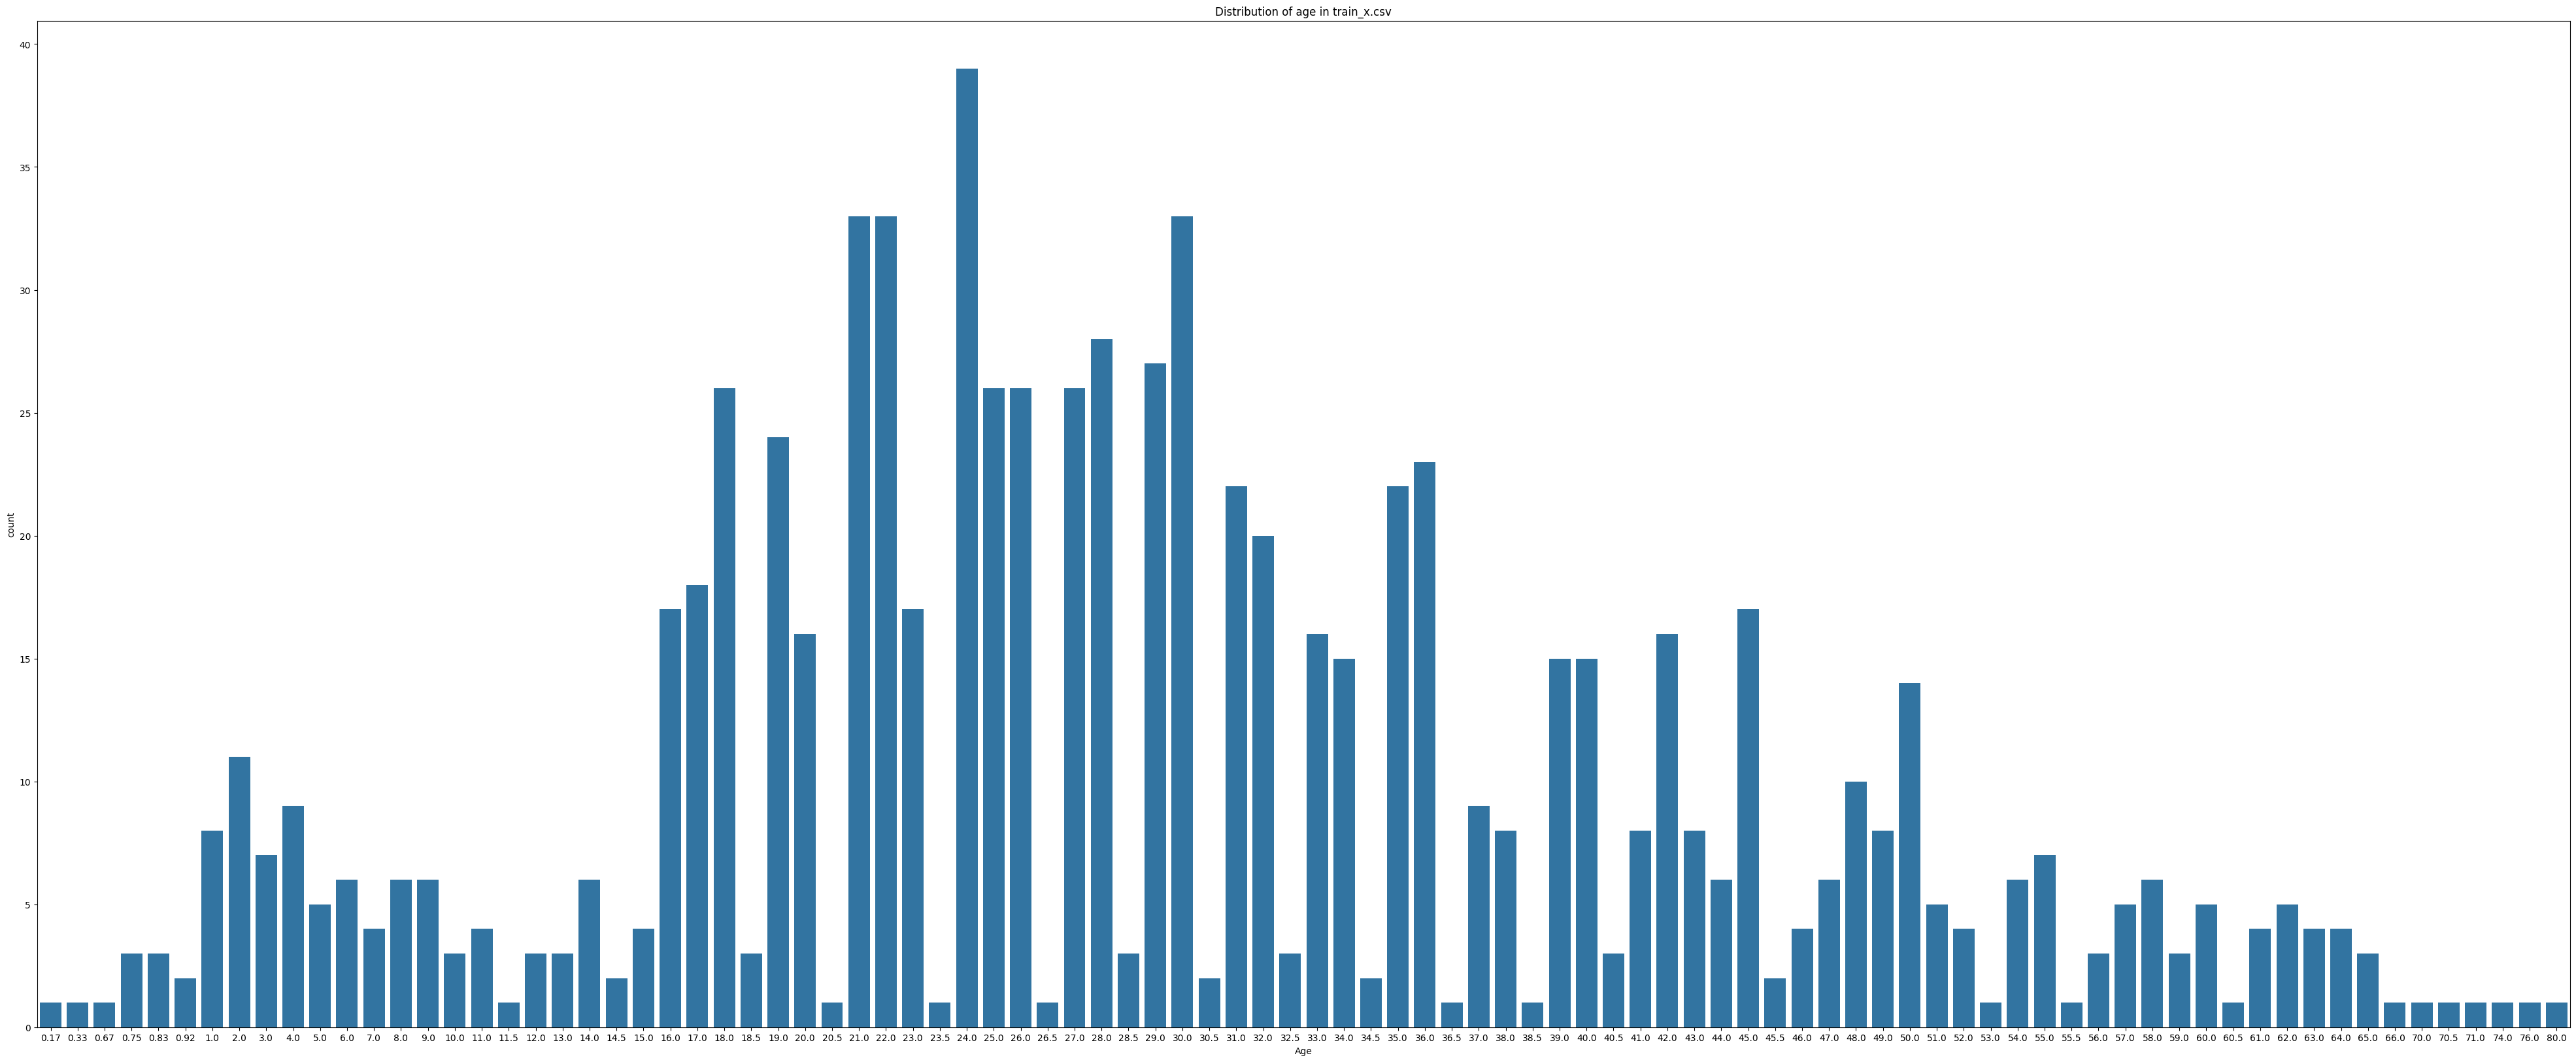

In [ ]:
# Print information about 'Age' in X_train_data
print('Information of age in train_x.csv')
print('Mean:', X_train_data['Age'].mean())
print('Minimum:', X_train_data['Age'].min())
print('Maximum:', X_train_data['Age'].max())
print('Median:', X_train_data['Age'].median())

# Visualize the distribution of 'Age' in X_train_data
plt.figure(figsize=(50, 20))
sns.countplot(x='Age', data=X_train_data)
plt.title('Distribution of age in train_x.csv')
plt.show()

Information of age in test_x.csv
Mean: 31.06743718592965
Minimum: 0.42
Maximum: 71.0
Median: 28.0


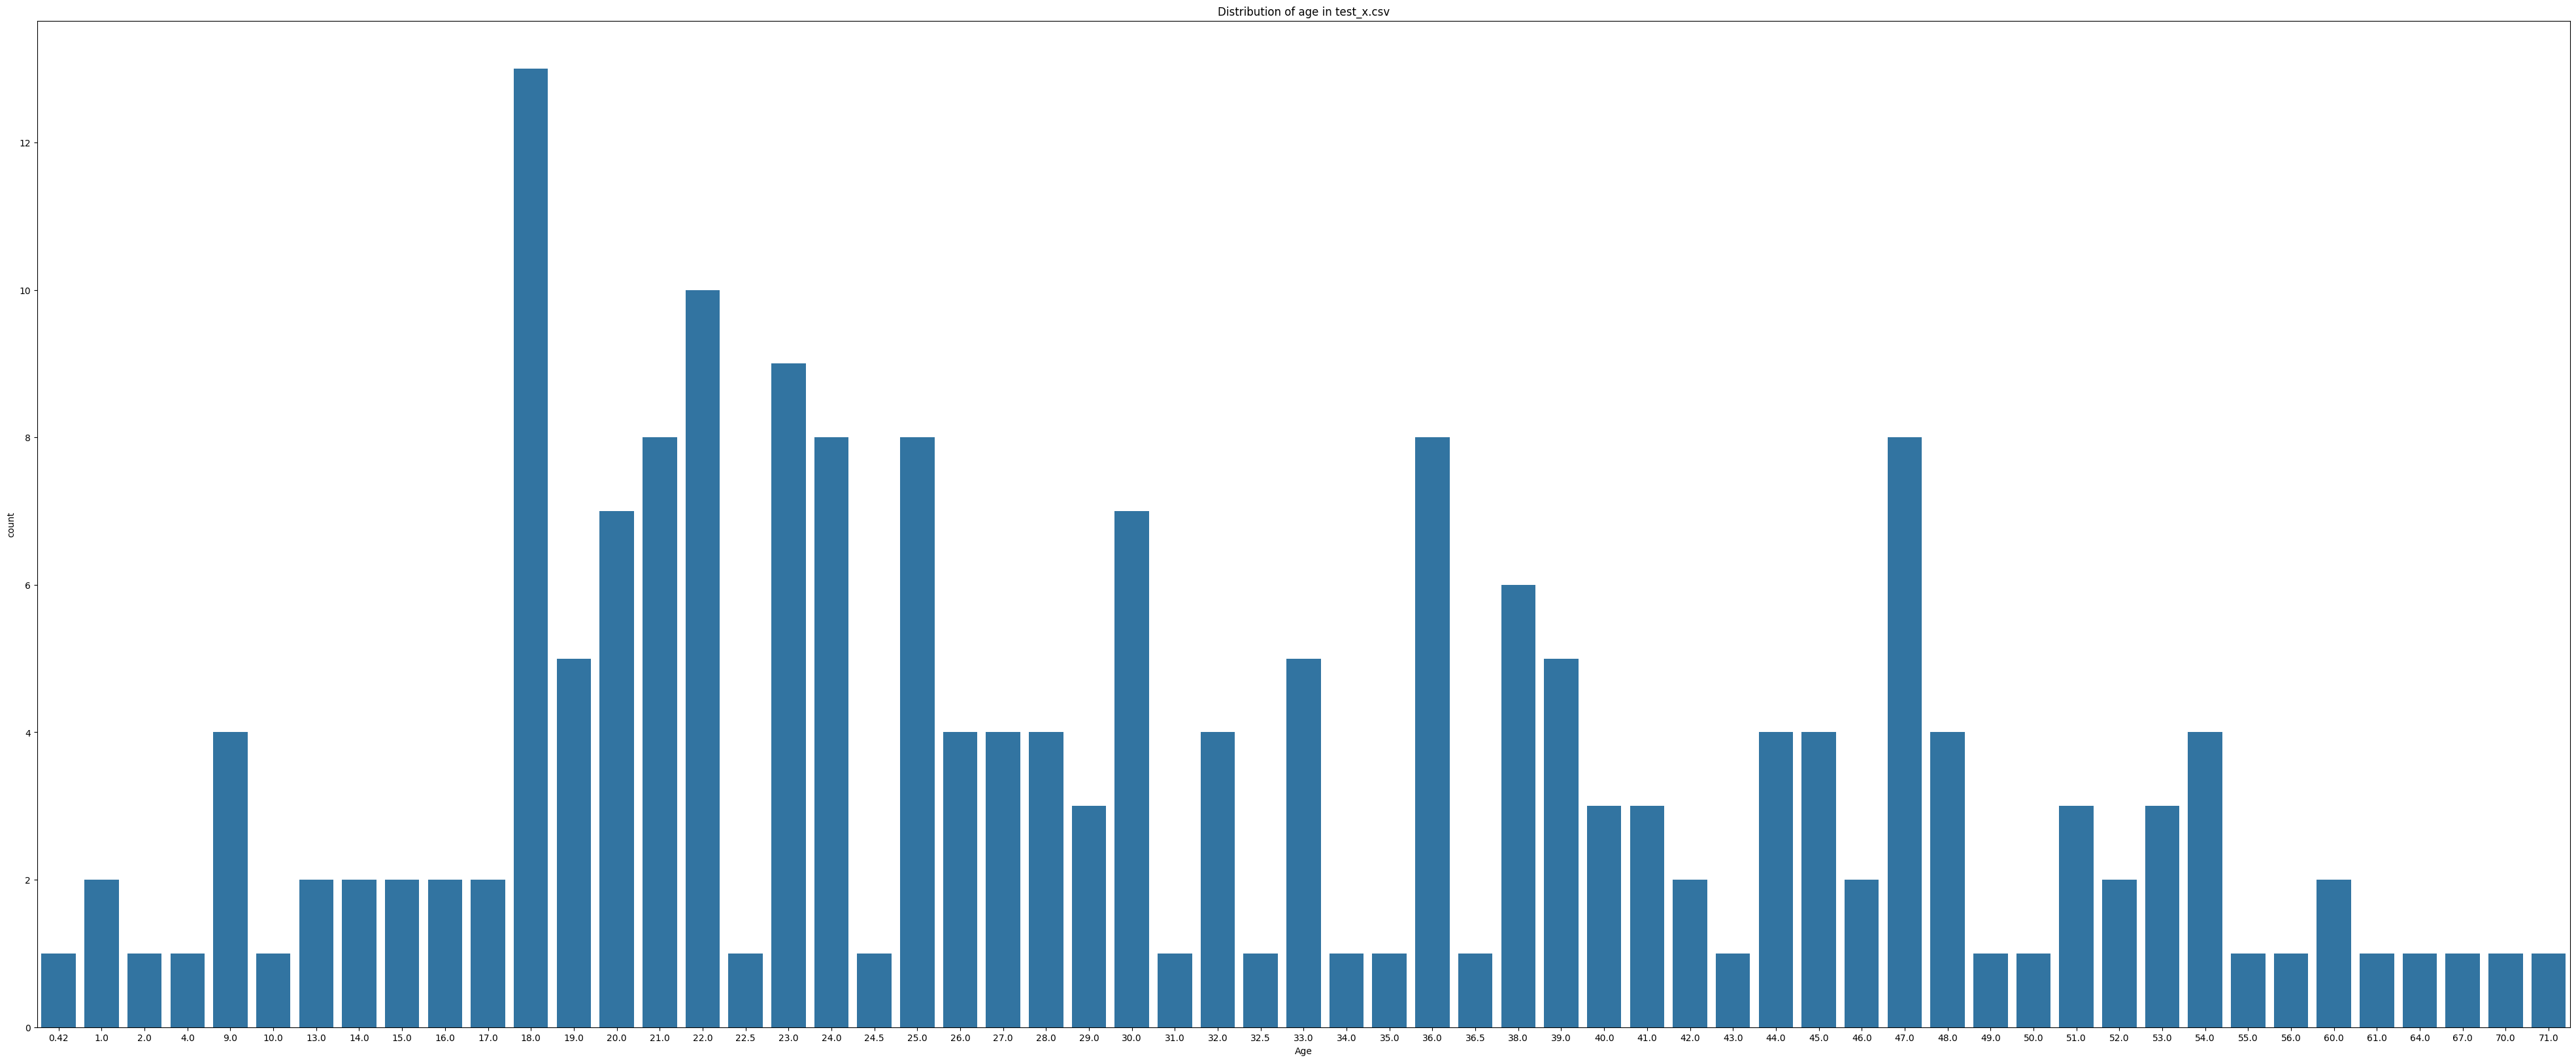

In [ ]:
# Print information about 'Age' in X_test_data
print('Information of age in test_x.csv')
print('Mean:', X_test_data['Age'].mean())
print('Minimum:', X_test_data['Age'].min())
print('Maximum:', X_test_data['Age'].max())
print('Median:', X_test_data['Age'].median())

# Visualize the distribution of 'Age' in X_test_data
plt.figure(figsize=(50, 20))
sns.countplot(x='Age', data=X_test_data)
plt.title('Distribution of age in test_x.csv')
plt.show()

In [ ]:
# Handle missing values in 'Age' column: replace NaN with median value
X_train_data['Age'].fillna(X_train_data['Age'].median(), inplace=True)
X_test_data['Age'].fillna(X_test_data['Age'].median(), inplace=True)

In [ ]:
# # Print information about 'Fare' and 'Embarked' in X_train_data
print('Information of fare and embarked in test_x.csv')
print(X_train_data['Fare'].value_counts())
print(X_train_data['Embarked'].value_counts())

Information of fare and embarked in test_x.csv
8.0500     50
13.0000    47
7.7500     43
26.0000    39
7.8958     35
           ..
9.2250      1
71.0000     1
4.0125      1
35.0000     1
25.7417     1
Name: Fare, Length: 260, dtype: int64
S    722
C    227
Q     96
Name: Embarked, dtype: int64


In [ ]:
# Handle missing values in 'Fare' and 'Embarked' columns: replace NaN with mode value
X_train_data['Fare'].fillna(8.0500, inplace=True)
X_train_data['Embarked'].fillna('S', inplace=True)

In [ ]:
# Make function to get derived variable of 'Age'
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

# Apply derived variable to 'Age' column
X_train_data['Age'] = X_train_data['Age'].apply(category_age)
X_test_data['Age'] = X_test_data['Age'].apply(category_age)

In [ ]:
# Encoding: map non-numerical variable into numerical variable
X_train_data['Sex'] = X_train_data['Sex'].map({'male': 1, 'female': 0})
X_train_data['Embarked'] = X_train_data['Embarked'].map({'C': 2, 'Q': 1, 'S': 0})
X_test_data['Sex'] = X_test_data['Sex'].map({'male': 1, 'female': 0})
X_test_data['Embarked'] = X_test_data['Embarked'].map({'C': 2, 'Q': 1, 'S': 0})

In [ ]:
# Re-check basic information of the transformed train dataset
print("Information of X_train_data")
print(X_train_data.info())
print("Information of X_test_data")
print(X_test_data.info())

Information of X_train_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   int64  
 1   Sex       1047 non-null   int64  
 2   Age       1047 non-null   int64  
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1047 non-null   float64
 6   Cabin     239 non-null    object 
 7   Embarked  1047 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 65.6+ KB
None
Information of X_test_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    262 non-null    int64  
 1   Sex       262 non-null    int64  
 2   Age       262 non-null    int64  
 3   SibSp     262 non-null    int64  
 4   Parch     262 non-null    int64  
 5  

In [ ]:
# Feature engineering
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train_unscaled = X_train_data[features]
X_test_unscaled = X_test_data[features]
y_train = y_train_data['Survived']

In [ ]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

## **2. EDA**

In [ ]:
# Combine X_train and y_train into train
train = pd.concat([X_train_data[features], y_train_data['Survived']], axis=1)

Survival of male
0    584
1     90
Name: Survived, dtype: int64
Survival of female
1    310
0     63
Name: Survived, dtype: int64


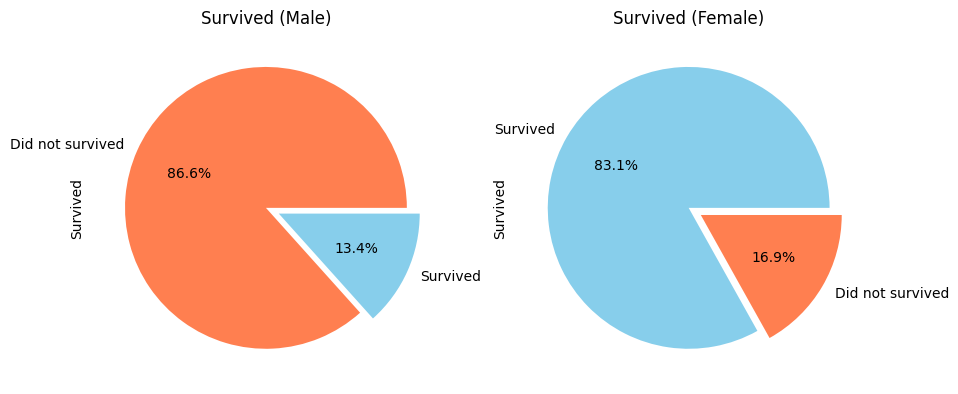

In [ ]:
# Statistical analysis of 'Survived' column according to 'Sex'
print("Survival of male")
print(train['Survived'][train['Sex'] == 1].value_counts())
print("Survival of female")
print(train['Survived'][train['Sex'] == 0].value_counts())

# Visualize percentage of survival according to gender
f, ax = plt.subplots(1, 2, figsize=(10, 6))
train['Survived'][train['Sex'] == 1].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], colors=['coral', 'skyblue'], labels=['Did not survived', 'Survived'])
train['Survived'][train['Sex'] == 0].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], colors=['skyblue', 'coral'], labels=['Survived', 'Did not survived'])
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')
plt.show()

Number of survived people in Pclass = 1
1    154
0    112
Name: Survived, dtype: int64
Number of survived people in Pclass = 2
0    128
1    100
Name: Survived, dtype: int64
Number of survived people in Pclass = 3
0    407
1    146
Name: Survived, dtype: int64


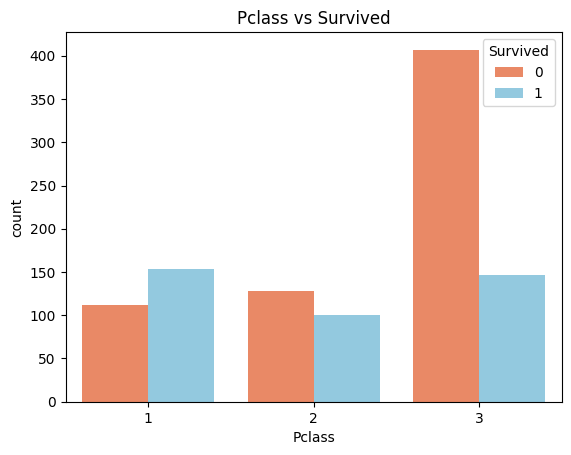

In [ ]:
# Statistical analysis of 'Survived' column according to 'Pclass'
print("Number of survived people in Pclass = 1")
print(train['Survived'][train['Pclass'] == 1].value_counts())
print("Number of survived people in Pclass = 2")
print(train['Survived'][train['Pclass'] == 2].value_counts())
print("Number of survived people in Pclass = 3")
print(train['Survived'][train['Pclass'] == 3].value_counts())

# Visualize the number of survived people according to pclass
colors = ['coral', 'skyblue']
sns.set_palette(sns.color_palette(colors))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Pclass vs Survived')
plt.show()

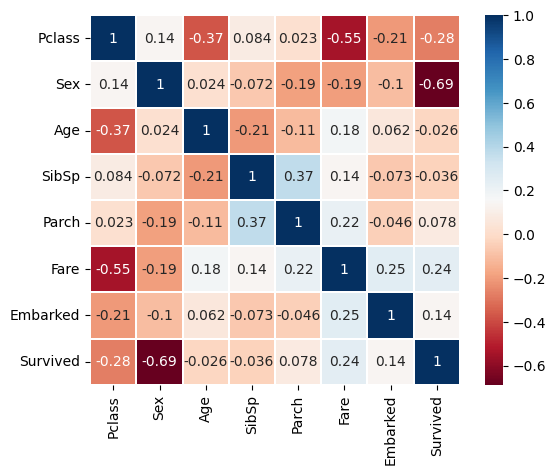

In [ ]:
# Visualize the result of correlation analysis using heatmap
heatmap_data = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 10})
plt.show()

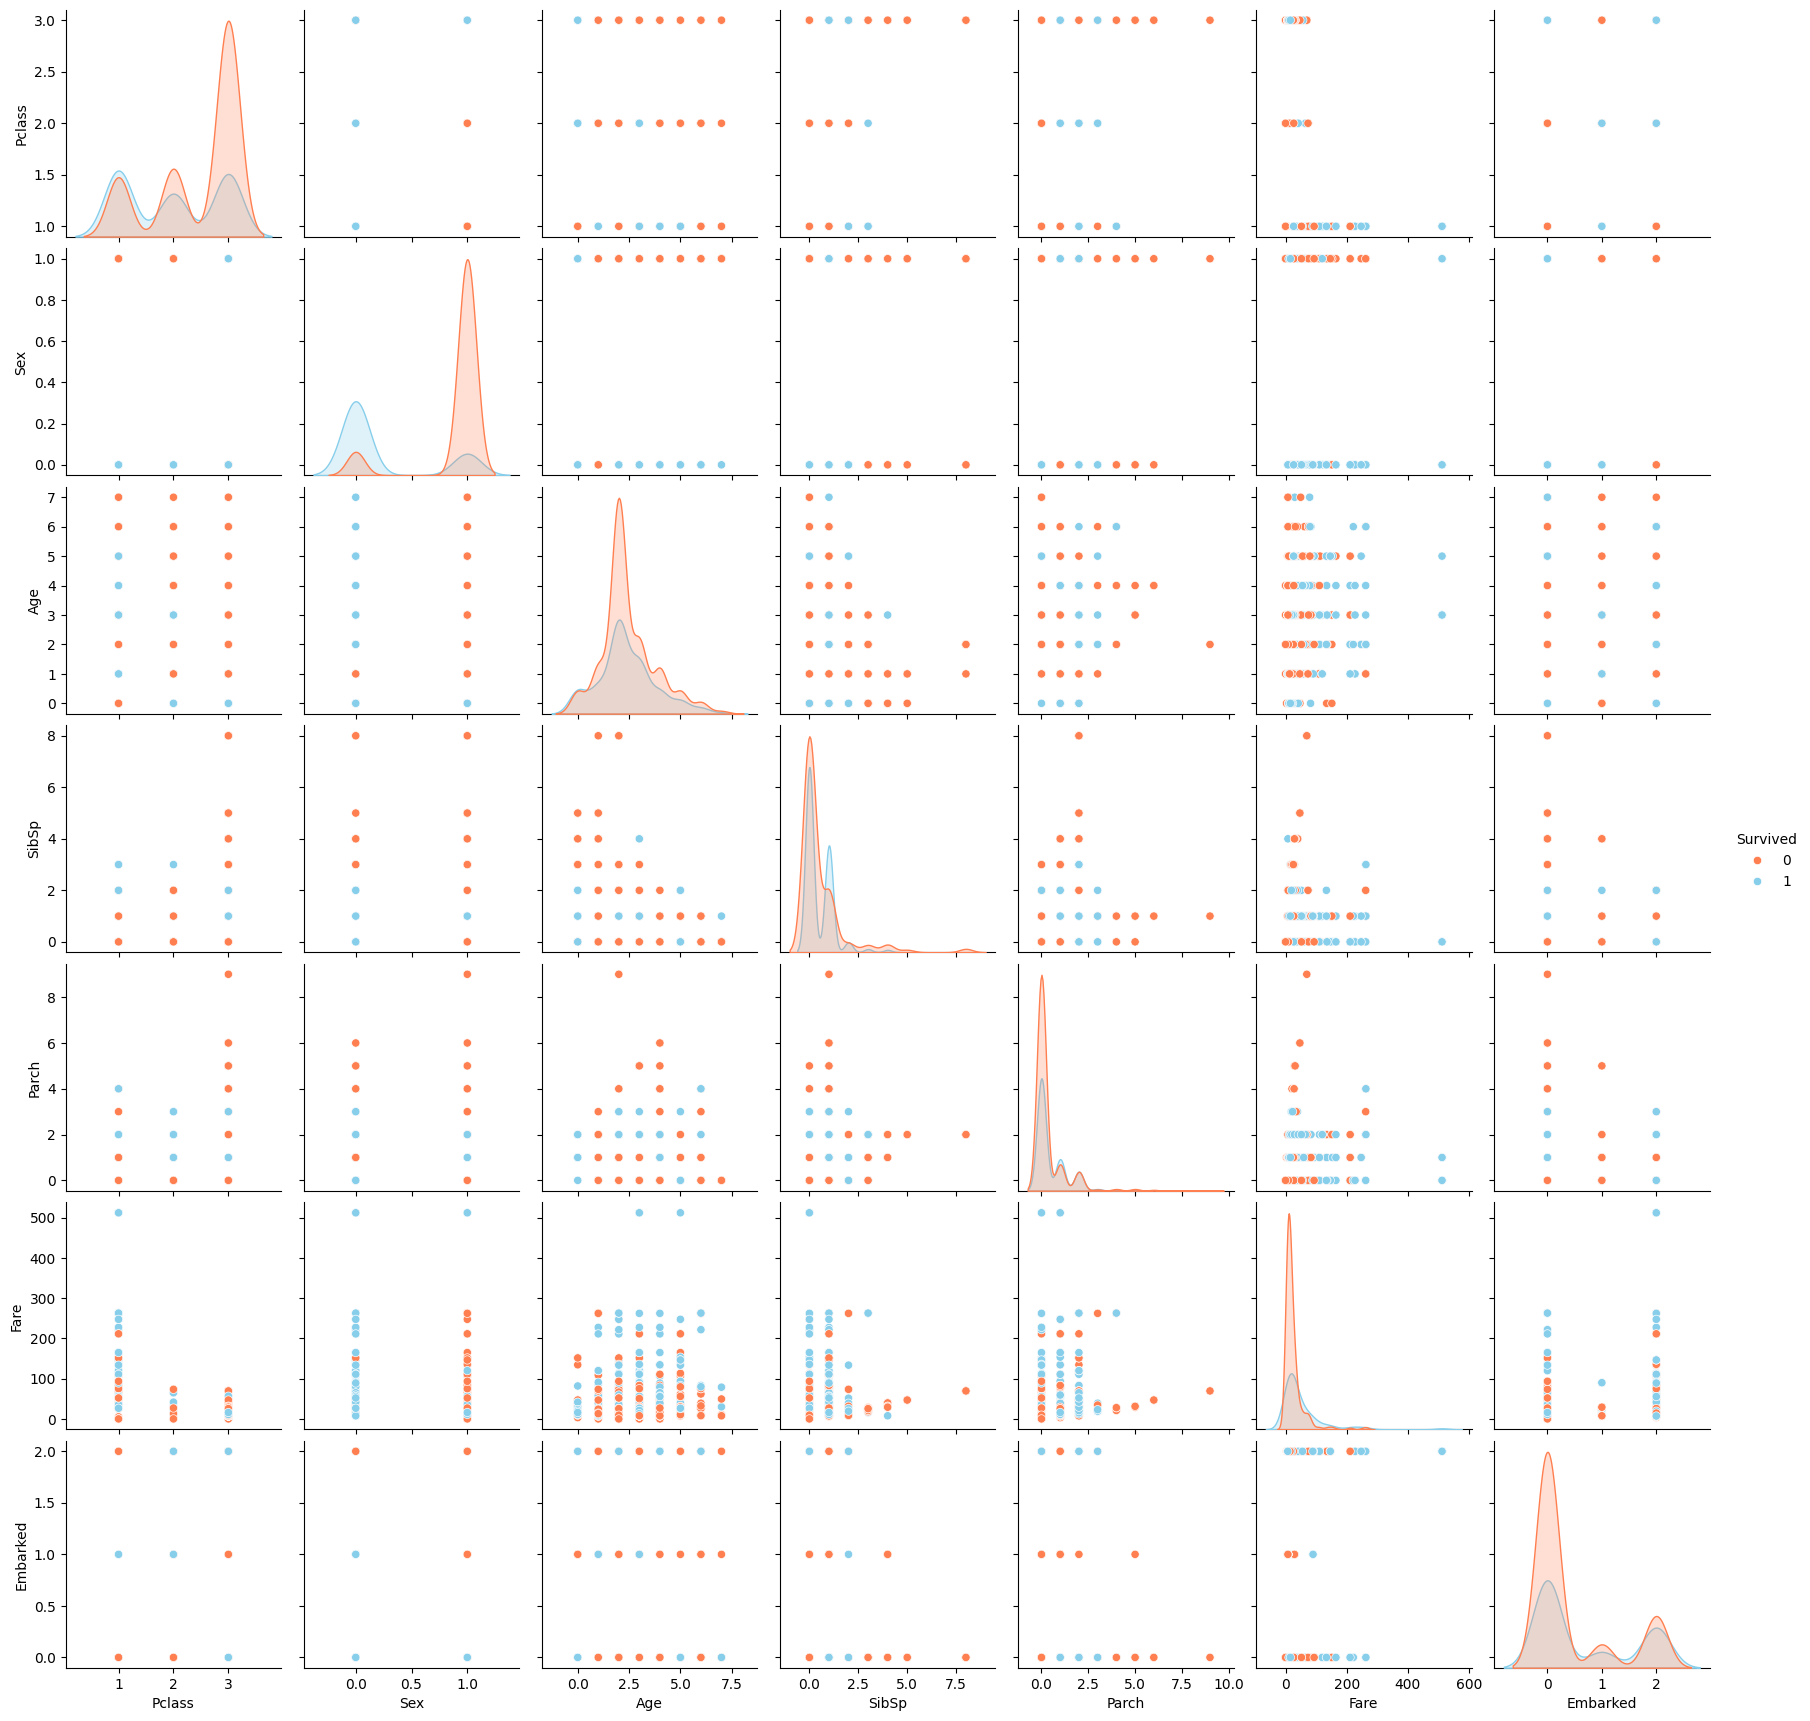

In [ ]:
# Visualize the result of correlation analysis using scatter plot
sns.pairplot(train, hue='Survived')
plt.show()

## **3. 모델링**

In [ ]:
# Split the train dataset into train set and validation set
# to evaluate the performance of the model with validation set instead of test set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

##### 3-1) Bagging with Decision Tree

In [ ]:
# 3-1) Bagging with Decision Tree

# Initialize model
dt = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42,
    bootstrap=True
)

# Fit the model
dt.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

##### 3-2) Bagging with Random Forest

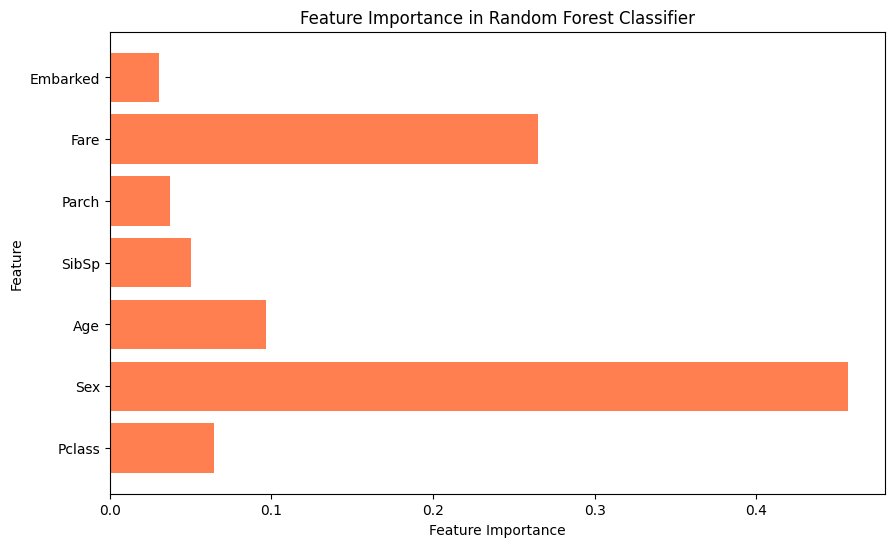

In [ ]:
# 3-2) Random Forest

# Initialize model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Feature Importance
feature_importances = rf.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(range(len(features)), feature_importances, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

##### 3-3) Bagging with K-Nearest Neighbors

In [ ]:
# 3-3) Bagging with K-Nearest Neighbors

# Initialize model
knn = BaggingClassifier(
    estimator=KNeighborsClassifier(n_neighbors=5),
    n_estimators=100,
    random_state=42
)

# Fit the model
knn.fit(X_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100,
                  random_state=42)

##### 3-4) Bagging with Support Vector Machine

In [ ]:
# 3-4) Bagging with Suppor Vector Machine

# Initialize model
svm = BaggingClassifier(
    estimator=SVC(kernel='rbf', C=10),
    n_estimators=100,
    random_state=42
)

# Fit the model
svm.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(C=10), n_estimators=100, random_state=42)

## **4. 리포팅**

In [ ]:
# Predict y_val
y_pred_dt = dt.predict(X_val)
y_pred_rf = rf.predict(X_val)
y_pred_knn = knn.predict(X_val)
y_pred_svm = svm.predict(X_val)

# Evaluate performance of decision tree
accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)
result_dt = [round(accuracy_dt, 4), round(precision_dt, 4), round(recall_dt, 4), round(f1_dt, 4)]

# Evaluate performance of random forest
accuracy_rf = accuracy_score(y_val, y_pred_rf)
precision_rf = precision_score(y_val, y_pred_rf)
recall_rf = recall_score(y_val, y_pred_rf)
f1_rf = f1_score(y_val, y_pred_rf)
result_rf = [round(accuracy_rf, 4), round(precision_rf, 4), round(recall_rf, 4), round(f1_rf, 4)]

# Evaluate performance of k-nearest neighbors
accuracy_knn = accuracy_score(y_val, y_pred_knn)
precision_knn = precision_score(y_val, y_pred_knn)
recall_knn = recall_score(y_val, y_pred_knn)
f1_knn = f1_score(y_val, y_pred_knn)
result_knn = [round(accuracy_knn, 4), round(precision_knn, 4), round(recall_knn, 4), round(f1_knn, 4)]

# Evaluate performance of support vector machine
accuracy_svm = accuracy_score(y_val, y_pred_svm)
precision_svm = precision_score(y_val, y_pred_svm)
recall_svm = recall_score(y_val, y_pred_svm)
f1_svm = f1_score(y_val, y_pred_svm)
result_svm = [round(accuracy_svm, 4), round(precision_svm, 4), round(recall_svm, 4), round(f1_svm, 4)]

# Print result for all models
col = ['accuracy', 'precision', 'recall', 'f1 score']
ind = ['DT', 'RF', 'KNN', 'SVM']
result = [result_dt, result_rf, result_knn, result_svm]
result_df = pd.DataFrame(result, columns=col, index=ind)
print(result_df)

     accuracy  precision  recall  f1 score
DT     0.8238     0.7879  0.6933    0.7376
RF     0.8190     0.7606  0.7200    0.7397
KNN    0.8476     0.8413  0.7067    0.7681
SVM    0.8429     0.8182  0.7200    0.7660


In [ ]:
# Since support vector machine shows the best performance, predict y_test using svm
y_pred_test = knn.predict(X_test)

In [ ]:
# Write the result into test_y.csv file
y_test = pd.DataFrame(y_pred_test, columns=['Survived'])
y_test.to_csv('/content/test_y.csv', index=False)

In [ ]:
# Combine X_test and y_test into test
test = pd.concat([X_test_data[features], y_test['Survived']], axis=1)

Survival of male
0    164
1      5
Name: Survived, dtype: int64
Survival of female
1    74
0    19
Name: Survived, dtype: int64


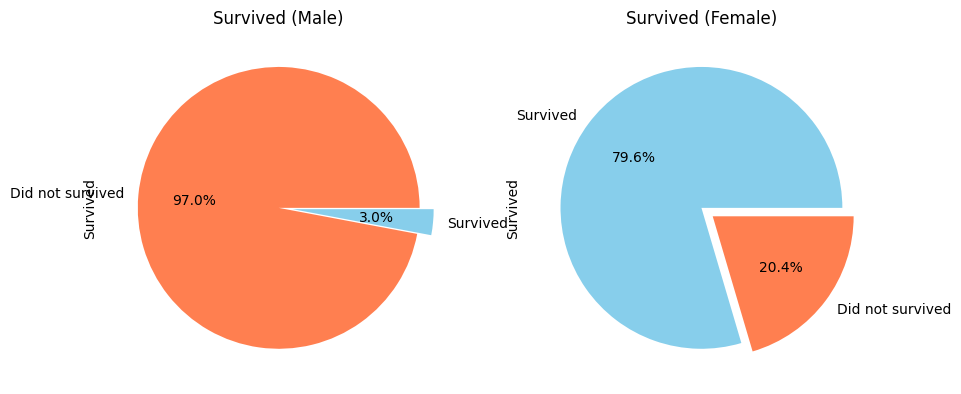

In [ ]:
# Statistical analysis of 'Survived' column according to 'Sex'
print("Survival of male")
print(test['Survived'][test['Sex'] == 1].value_counts())
print("Survival of female")
print(test['Survived'][test['Sex'] == 0].value_counts())

# Visualize percentage of survival according to gender
f, ax = plt.subplots(1, 2, figsize=(10, 6))
test['Survived'][test['Sex'] == 1].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], colors=['coral', 'skyblue'], labels=['Did not survived', 'Survived'])
test['Survived'][test['Sex'] == 0].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], colors=['skyblue', 'coral'], labels=['Survived', 'Did not survived'])
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')
plt.show()

Number of survived people in Pclass = 1
0    32
1    25
Name: Survived, dtype: int64
Number of survived people in Pclass = 2
0    30
1    19
Name: Survived, dtype: int64
Number of survived people in Pclass = 3
0    121
1     35
Name: Survived, dtype: int64


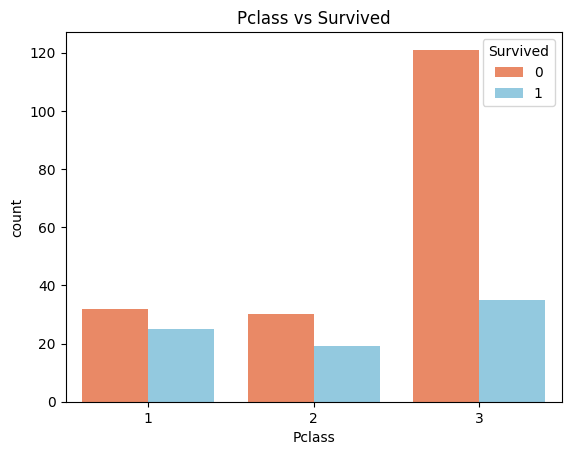

In [ ]:
# Statistical analysis of 'Survived' column according to 'Pclass'
print("Number of survived people in Pclass = 1")
print(test['Survived'][test['Pclass'] == 1].value_counts())
print("Number of survived people in Pclass = 2")
print(test['Survived'][test['Pclass'] == 2].value_counts())
print("Number of survived people in Pclass = 3")
print(test['Survived'][test['Pclass'] == 3].value_counts())

# Visualize the number of survived people according to pclass
colors = ['coral', 'skyblue']
sns.set_palette(sns.color_palette(colors))
sns.countplot(x='Pclass', hue='Survived', data=test)
plt.title('Pclass vs Survived')
plt.show()

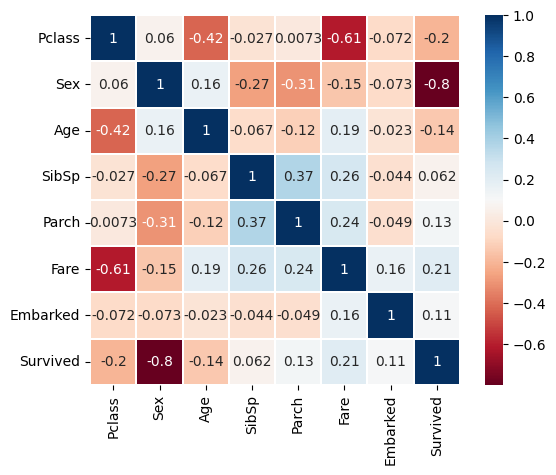

In [ ]:
# Visualize the result of correlation analysis using heatmap
heatmap_data = test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
colormap = plt.cm.RdBu
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 10})
plt.show()